In [2]:
from orquestra.integrations.qiskit.conversions import import_from_qiskit
from orquestra.integrations.cirq.conversions import export_to_cirq
import cirq
import qsimcirq
from qiskit import QuantumCircuit

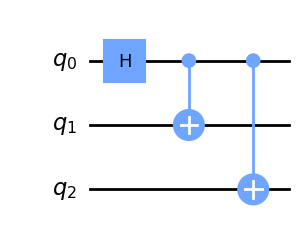

In [3]:
circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(0, 2)
circ.draw('mpl')

In [4]:
qiskit_circ = import_from_qiskit(circ)
qiskit_circ

Circuit(operations=[H(0), CNOT(0,1), CNOT(0,2)], n_qubits=3)

In [5]:
qubits = cirq.LineQubit.range(3)
cirq_circ = export_to_cirq(qiskit_circ)
cirq_circ.append(cirq.measure(*qubits))

In [6]:
def create_qsim_options(
    max_fused_gate_size=2,
    disable_gpu=False,
    cpu_threads=1,
    gpu_mode=(0,),
    verbosity=0,
    n_subsvs=-1,
    use_sampler=None,
    debug=False
):
    return qsimcirq.QSimOptions(
        max_fused_gate_size=max_fused_gate_size,
        disable_gpu=disable_gpu,
        cpu_threads=cpu_threads,
        gpu_mode=gpu_mode,
        verbosity=verbosity,
        n_subsvs=n_subsvs,
        use_sampler=use_sampler,
        debug=debug
    )

def qsim_options_from_arguments(ngpus):
    if ngpus > 1:
        return create_qsim_options(gpu_mode=ngpus)
    elif ngpus == 1:
        return create_qsim_options()
    elif ngpus == 0:
        return create_qsim_options(disable_gpu=True, gpu_mode=0, use_sampler=False)

In [7]:
ngpus=1
qsim_options = qsim_options_from_arguments(ngpus)
simulator = qsimcirq.QSimSimulator(qsim_options=qsim_options)
results = simulator.run(cirq_circ, repetitions=10)
results

0,1,2=0011010000, 0011010000, 0011010000